In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [102]:
data = pd.read_csv('../data/cleaned/star_dataset.csv')

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3475 entries, 0 to 3474
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   City           3475 non-null   object
 1   Business Name  3475 non-null   object
 2   Stars          3475 non-null   int64 
 3   TrueTimestamp  3475 non-null   object
dtypes: int64(1), object(3)
memory usage: 108.7+ KB


In [104]:
data.head(5)

,City,Business Name,Stars,TrueTimestamp
0,agadir,Attijariwafa Bank,2,2022-03-14 21:22:17.360486
1,agadir,Attijariwafa Bank,4,2023-03-14 21:22:17.360486
2,agadir,Attijariwafa Bank,5,2024-12-13 21:22:17.360486
3,agadir,Attijariwafa Bank,1,2024-10-14 21:22:17.360486
4,agadir,Attijariwafa Bank,5,2024-09-14 21:22:17.360486


In [105]:
data['Stars'].describe()

count    3475.000000
mean        2.265612
std         1.686398
min         1.000000
25%         1.000000
50%         1.000000
75%         4.000000
max         5.000000
Name: Stars, dtype: float64

C:\Users\bader\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


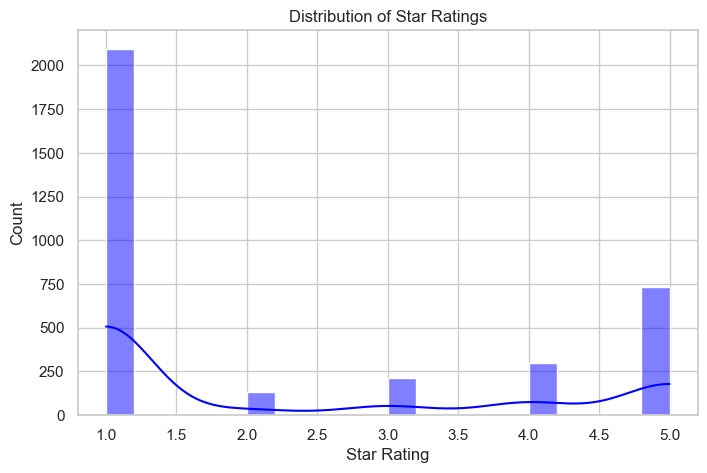

In [106]:
sns.set(style="whitegrid")

# Plot histogram of star ratings
plt.figure(figsize=(8,5))
sns.histplot(data["Stars"], bins=20, kde=True, color="blue")

# Labels and title
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.title("Distribution of Star Ratings")

# Show plot
plt.show()

THIS SHOWS US THAT MOROCCANS ARE NOT VERY HAPPY WITH MOROCCAN BANKS SERVICES IN GENERAL , PLUS PEOPLE ONLY LEAVE REVIEWS WHEN THEY ARE VERY OR NOT SATISFIED



-> lets check how rating evolve over time

C:\Users\bader\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bader\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


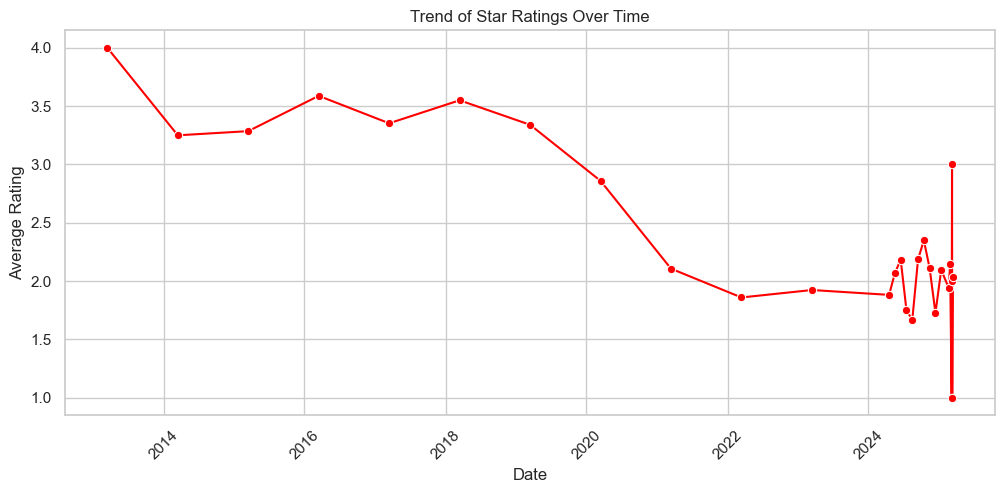

In [107]:
# Convert timestamp column to datetime format
data["TrueTimestamp"] = pd.to_datetime(data["TrueTimestamp"])

# Group by date and calculate average rating
data["Date"] = data["TrueTimestamp"].dt.date
rating_trend = data.groupby("Date")["Stars"].mean().reset_index()

# Plot the trend
plt.figure(figsize=(12,5))
sns.lineplot(data=rating_trend, x="Date", y="Stars", marker="o", color="red")

plt.xlabel("Date")
plt.ylabel("Average Rating")
plt.title("Trend of Star Ratings Over Time")

plt.xticks(rotation=45)
plt.show()


LETS SMOOTHEN THE TREND

these visuals are dont seem to be right , lets detect and outliers and fix it

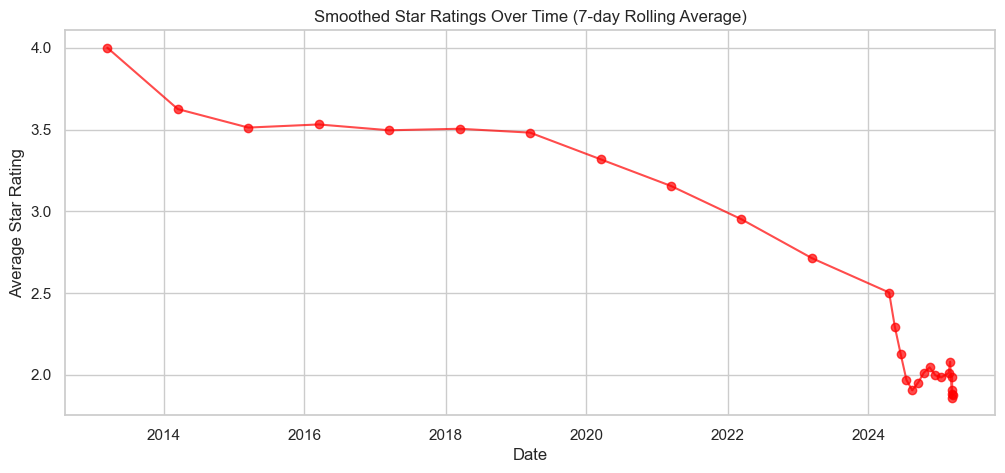

In [108]:


# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])


today = pd.Timestamp.today()
data_clean = data[data['Date'] <= today]

df_daily_avg = data_clean.groupby('Date')['Stars'].mean()

# Apply a 7-day rolling average for smoothing
df_smoothed = df_daily_avg.rolling(window=7, min_periods=1).mean()

# Plot the smoothed data
plt.figure(figsize=(12, 5))
plt.plot(df_smoothed.index, df_smoothed.values, marker='o', linestyle='-', color='red', alpha=0.7)
plt.title("Smoothed Star Ratings Over Time (7-day Rolling Average)")
plt.xlabel("Date")
plt.ylabel("Average Star Rating")
plt.grid(True)
plt.show()
#THE IDEA IS TO CALCULATE THE AVG RATING ON EACH DAY TO BALANCE RATING OCCURENCES THROUGH THE YEARS


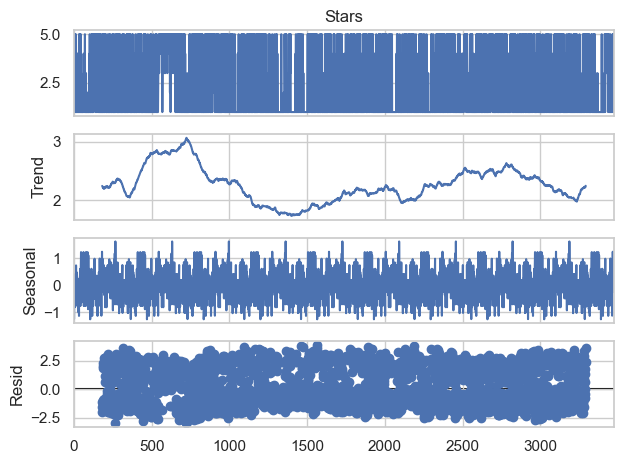

In [109]:
#applying time series
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(data['Stars'], model='additive', period=365)  # Adjust 'period' based on your data
decomposition.plot()
plt.show()

In [110]:
bank_avg_ratings = data.groupby("Business Name")["Stars"].mean()

outliers = bank_avg_ratings[(bank_avg_ratings < 1.1) | (bank_avg_ratings > 4.9)]

print("Outlier Banks (dont have enough reviews so far ):")
print(outliers)


Outlier Banks (dont have enough reviews so far ):
Business Name
Assafa bank    1.0
Name: Stars, dtype: float64


In [111]:
#removing them
# Remove reviews from extreme banks
df_filtered = data[~data["Business Name"].isin(outliers.index)]

# Save cleaned dataset
df_filtered.to_csv("data/star_dataset_no_outliers.csv", index=False)

print("Outliers removed. New dataset saved.")


Outliers removed. New dataset saved.


In [112]:
df = pd.read_csv("../data/cleaned/star_dataset_no_outliers.csv")
df['Business Name'].unique()

array(['Attijariwafa Bank', 'Société Générale', 'Bank of Africa',
       'Banque Populaire', 'Other', 'Al Barid Bank', 'Crédit Agricole',
       'Bank Al-Maghrib', 'Bank Al Yousr', 'Bank Assafa', 'CIH'],
      dtype=object)

In [113]:
df['Stars'].describe()

count    3474.000000
mean        2.265976
std         1.686504
min         1.000000
25%         1.000000
50%         1.000000
75%         4.000000
max         5.000000
Name: Stars, dtype: float64

C:\Users\bader\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


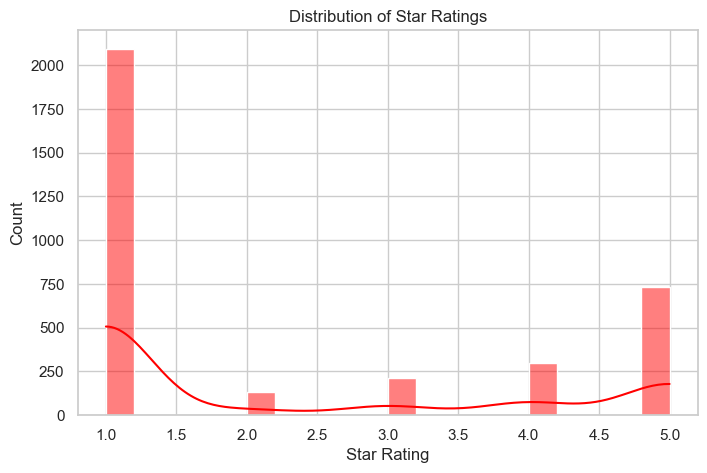

In [114]:
plt.figure(figsize=(8,5))
sns.histplot(df["Stars"], bins=20, kde=True, color="red")

# Labels and title
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.title("Distribution of Star Ratings")

# Show plot
plt.show()

this indicates that people often leave reviews when too satisfied or not satisfied

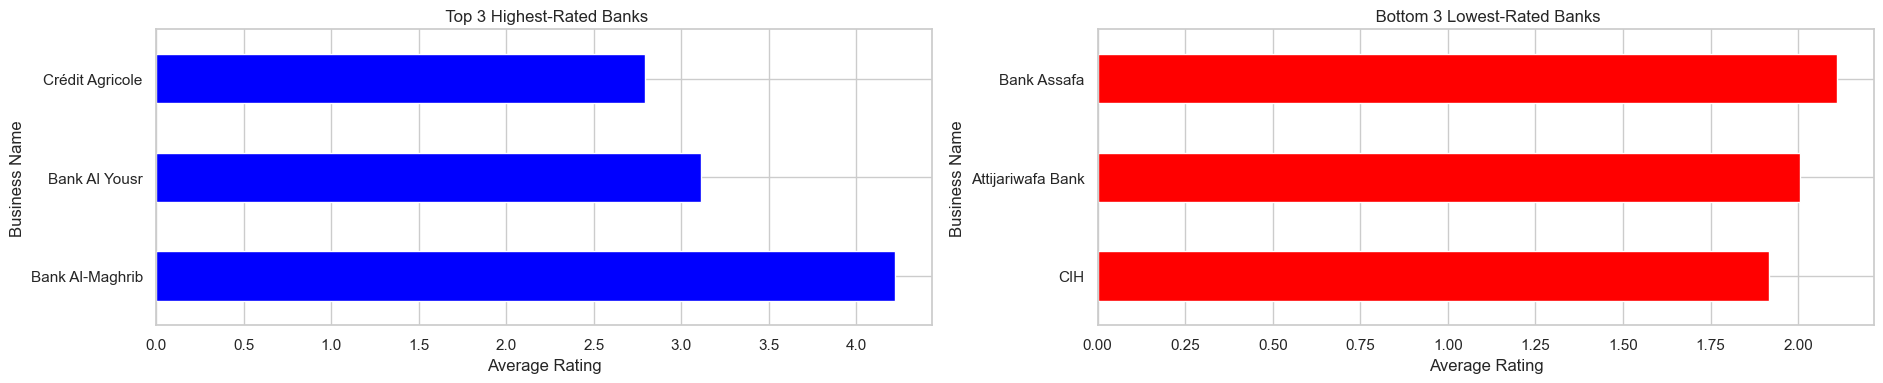

In [115]:
# Compute average ratings per bank
bank_ratings = df.groupby("Business Name")["Stars"].mean()

# Sort and select top & bottom 10
top_10 = bank_ratings.nlargest(3)
bottom_10 = bank_ratings.nsmallest(3)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(19, 4))

top_10.plot(kind="barh", ax=ax[0], color="blue")
ax[0].set_title(" Top 3 Highest-Rated Banks")
ax[0].set_xlabel("Average Rating")

bottom_10.plot(kind="barh", ax=ax[1], color="red")
ax[1].set_title(" Bottom 3 Lowest-Rated Banks")
ax[1].set_xlabel("Average Rating")

plt.tight_layout()
plt.show()

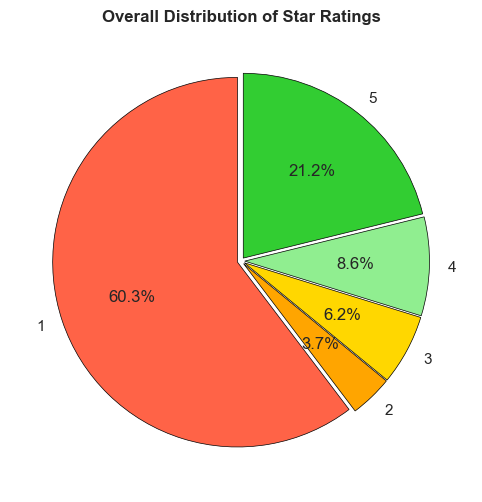

In [116]:


# Assuming 'Stars' column contains ratings (1-5)
star_counts = data['Stars'].value_counts().sort_index()  # Count and sort by rating


plt.figure(figsize=(8, 6))
star_counts.plot.pie(
    autopct='%.1f%%',       # Show percentages
    labels=['1', '2', '3', '4', '5'],  # Custom labels
    colors=['tomato', 'orange', 'gold', 'lightgreen', 'limegreen'],
    startangle=90,          # Rotate to start at top
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5},
    explode=[0.02]*5        # Slightly separate slices
)
plt.title('Overall Distribution of Star Ratings', fontweight='bold')
plt.ylabel('')  # Hide default label
plt.show()

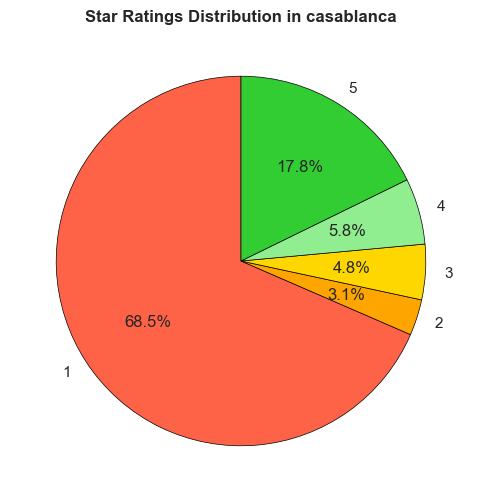

In [117]:
import random

# Group by 'City' and count ratings
grouped = data.groupby(['City', 'Stars']).size().unstack()

# Get a random city from the grouped data (not from original data)
random_city = random.choice(grouped.index)

# Get ratings for the random city
city_ratings = grouped.loc[random_city]

# Plot
plt.figure(figsize=(8, 6))
city_ratings.plot.pie(
    autopct='%.1f%%',
    labels=['1', '2', '3', '4', '5'],
    colors=['tomato', 'orange', 'gold', 'lightgreen', 'limegreen'],
    startangle=90,
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}
)
plt.title(f'Star Ratings Distribution in {random_city}', fontweight='bold')
plt.ylabel('')
plt.show()